In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mastercurves import MasterCurve
from mastercurves.transforms import Multiply

In [3]:
import lmfit
import pybroom as pb
from IPython.display import Math


def TC(x, ystress=1.0, eta_bg=0.1, gammadot_crit=0.1):
    """Three component model
    Note:
    .. math::
       \sigma=\sigma_y+\sigma_y\cdot(\dot\gamma/\dot\gamma_c)^{0.5}+\eta_{bg}\cdot\dot\gamma
    Args:
        ystress: yield stress [Pa]
        eta_bg : Background viscosity [Pa s]
        gammadot_crit : Critical shear rate [1/s]
    Returns:
        stress : Shear Stress, [Pa]
    """
    return ystress + ystress * (x / gammadot_crit) ** 0.5 + eta_bg * x


TC_model = lmfit.Model(TC, prefix="TC_")
""" Lmfit model from equation :meth:`rheofit.models.TC`
Note:
TC_model.set_param_hint('ystress', min=0)
TC_model.set_param_hint('eta_bg', min=0, vary=True)
TC_model.set_param_hint('gammadot_crit', min=0)
"""
TC_model.model_expression = Math(
    "\sigma=\sigma_y+\sigma_y\cdot(\dot\gamma/\dot\gamma_c)^{0.5}+\eta_{bg}\cdot\dot\gamma"
)

TC_model.set_param_hint("ystress", min=0)
TC_model.set_param_hint("eta_bg", min=0, vary=True)
TC_model.set_param_hint("gammadot_crit", min=0)


def HB(x, ystress=1.0, K=1.0, n=0.5):
    """Hershel-Bulkley Model
    Note:
    .. math::
       \sigma= \sigma_y + K \cdot \dot\gamma^n
    Args:
        ystress: yield stress [Pa]
        K : Consistency index [Pa s^n]
        n : Shear thinning index []
    Returns:
        stress : Shear Stress, [Pa]
    """
    return ystress + K * x**n


HB_model = lmfit.Model(HB, prefix="HB_")
""" Lmfit model from equation :meth:`rheofit.models.HB`
Note:
HB_model.set_param_hint('ystress', min=0)
HB_model.set_param_hint('K', min=0, vary=True)
HB_model.set_param_hint('n', min=0.0,max=1,vary=True)
"""

HB_model.model_expression = Math("\sigma=\sigma_y+K\cdot\dot\gamma^n")

HB_model.set_param_hint("ystress", min=0)
HB_model.set_param_hint("K", min=0, vary=True)
HB_model.set_param_hint("n", min=0.0, max=1, vary=True)

# Data

```
@article{dekker2018scaling,
  title={Scaling of flow curves: Comparison between experiments and simulations},
  author={Dekker, Riande I and Dinkgreve, Maureen and de Cagny, Henri and Koeze, Dion J and Tighe, Brian P and Bonn, Daniel},
  journal={Journal of non-Newtonian fluid mechanics},
  volume={261},
  pages={33--37},
  year={2018},
  publisher={Elsevier}
}
```
[url link](https://reader.elsevier.com/reader/sd/pii/S0377025718301198?token=4A181B91BF1BD2BF2545A735D9BF2C144DB55E159C4D6B955CE57F749CDCC2FAA11D330663A2382814EF1869172BF1D0&originRegion=us-east-1&originCreation=20220916193902)

figure 2

<div>
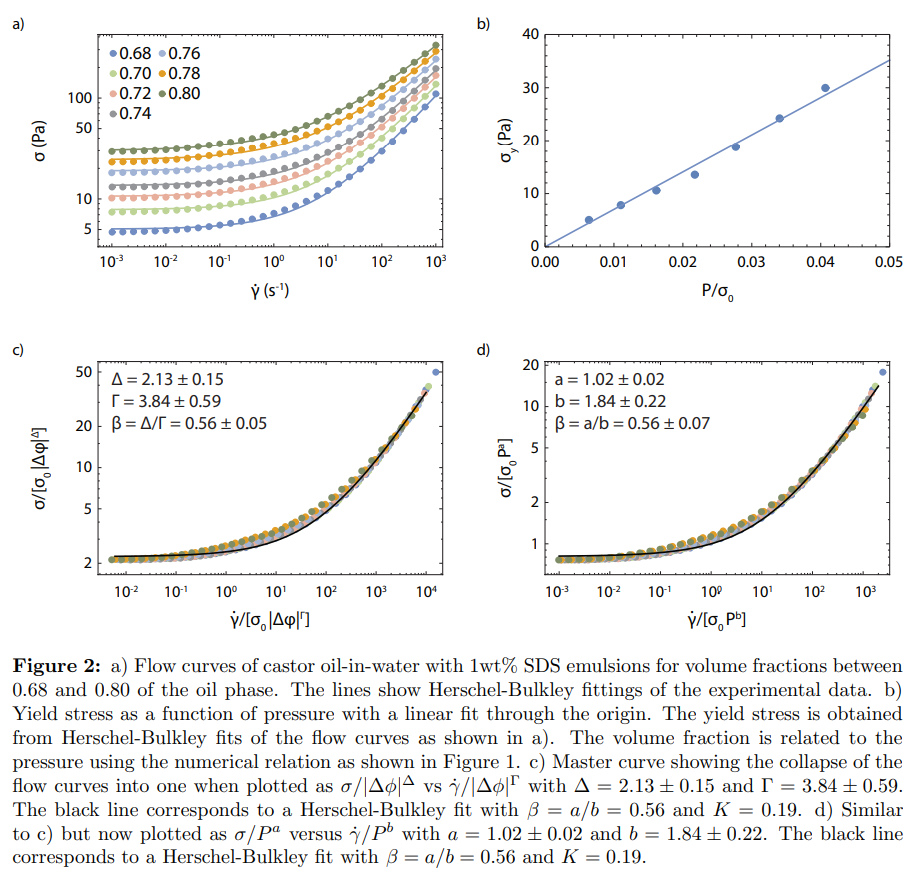
</div>



In [4]:
# edited the csv file from webplotdigitizer to have the phi over both the X and the Y
data = pd.read_csv("./emulsions_v2.csv", header=[0, 1]).dropna()
sample_list = list(data.columns.get_level_values(0).unique())
data.head()

0.68                0.70                0.72                 0.74  \
          X         Y         X         Y         X          Y         X   
0  0.001004  4.662605  0.000996  7.445899  0.001002   9.948157  0.001015   
1  0.001570  4.717239  0.001552  7.486368  0.001558  10.046245  0.001591   
2  0.002472  4.704130  0.002539  7.551453  0.002485  10.011023  0.002485   
3  0.004041  4.743921  0.003987  7.541941  0.003919  10.160213  0.003977   
4  0.006120  4.774533  0.006315  7.638128  0.006245  10.215939  0.006194   

                  0.76                 0.78                 0.80             
           Y         X          Y         X          Y         X          Y  
0  13.147188  0.000989  17.963594  0.001016  23.473078  0.001005  28.759814  
1  13.153683  0.001573  18.118881  0.001582  23.693964  0.001547  29.201112  
2  13.164498  0.002492  18.076492  0.002493  23.699240  0.002458  29.458740  
3  13.282808  0.003928  18.250644  0.003933  23.961911  0.003925  29.519608  
4  13.390445  0.006247  18.400887  0.006283  24.108121  0.006240  29.837016

In [5]:
plt.style.library.keys()

dict_keys(['seaborn-v0_8-pastel', 'fast', 'bmh', '_classic_test_patch', 'fivethirtyeight', 'tableau-colorblind10', 'dark_background', 'seaborn-v0_8-dark', 'grayscale', 'seaborn-v0_8-poster', 'seaborn-v0_8', 'seaborn-v0_8-muted', 'classic', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-ticks', 'seaborn-v0_8-talk', 'seaborn-v0_8-deep', '_mpl-gallery-nogrid', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-white', 'Solarize_Light2', 'ggplot', '_mpl-gallery', 'seaborn-v0_8-bright', 'seaborn-v0_8-whitegrid', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'science', 'scatter', 'notebook', 'ieee', 'nature', 'std-colors', 'retro', 'vibrant', 'high-contrast', 'light', 'high-vis', 'bright', 'muted', 'pgf', 'cjk-jp-font', 'no-latex', 'grid', 'russian-font', 'sans', 'latex-sans', 'cjk-tc-font', 'cjk-sc-font', 'cjk-kr-font', 'turkish-font'])

In [6]:
%matplotlib inline

# Figure raw_data

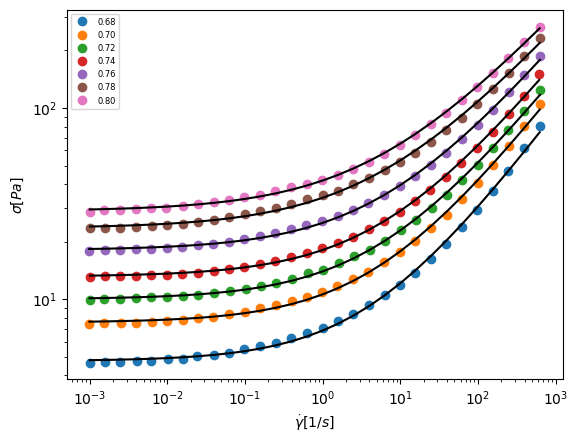

In [7]:
fit_res_dict_HB = {}

with plt.rc_context({"legend.fontsize": 6}):
    fig, ax = plt.subplots()

    for sample in sample_list:
        fit = HB_model.fit(
            data[sample]["Y"],
            x=data[sample]["X"],
            weights=1 / data[sample]["Y"],
            nan_policy="omit",
        )
        fit_res_dict_HB[sample] = fit

        ax.plot(
            data[sample]["X"],
            data[sample]["Y"],
            marker="o",
            linestyle="None",
            label=sample,
        )
        ax.plot(data[sample]["X"], fit.eval(x=data[sample]["X"]), color="black")

        ax.set_yscale("log")
        ax.set_xscale("log")

    plt.legend()

    ax.set_xlabel("$\dot\gamma [1/s]$")
    ax.set_ylabel("$\sigma [Pa]$")

plt.savefig("raw_data.svg", bbox_inches="tight", transparent=True)

In [8]:
fit_res_table_HB = pb.tidy(fit_res_dict_HB).pivot(
    index="key", columns="name", values="value"
)
fit_res_table_HB

name,HB_K,HB_n,HB_ystress
key,,,
0.68,2.101042,0.544334,4.753559
0.70,3.044848,0.526850,7.556103
0.72,3.966052,0.511276,10.005314
0.74,4.944722,0.505275,13.136479
0.76,6.985757,0.486343,18.074420
0.78,10.358396,0.456043,23.551939
0.80,12.828377,0.449831,28.902420


# Figure HB_mastercurve_no_fit

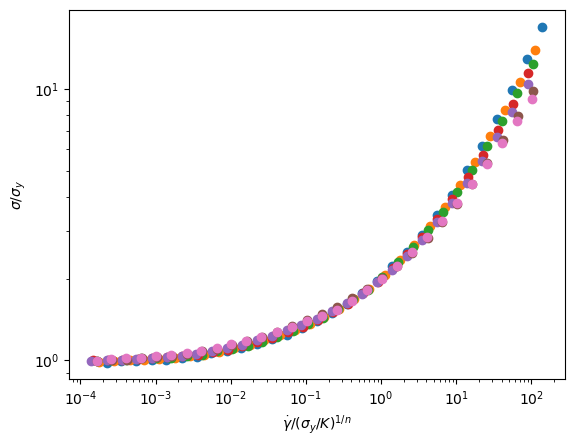

In [9]:
with plt.rc_context({"legend.fontsize": 6}):

    fig, ax = plt.subplots()

    for sample in sample_list:
        x_rescale = (
            fit_res_table_HB["HB_ystress"][sample]
            / fit_res_table_HB["HB_K"][sample]
        ) ** (1 / fit_res_table_HB["HB_n"][sample])

        ax.plot(
            data[sample]["X"] / x_rescale,
            data[sample]["Y"] / fit_res_table_HB["HB_ystress"][sample],
            marker="o",
            linestyle="None",
            label=sample,
        )

        ax.set_yscale("log")
        ax.set_xscale("log")

    ax.set_xlabel("$\dot\gamma / (\sigma_{y}/K)^{1/n}$")
    ax.set_ylabel("$\sigma / \sigma_{y}$")
plt.savefig("HB_mastercurve_no_fit.svg", bbox_inches="tight", transparent=True)

# Figure TC_mastercurve_no_fit

In [10]:
fit_res_dict_TC = {}

for sample in sample_list:
    TC_model.set_param_hint("TC_eta_bg", value=0.045, vary=False)
    fit = TC_model.fit(
        data[sample]["Y"],
        x=data[sample]["X"],
        weights=1 / data[sample]["Y"],
        nan_policy="omit",
    )
    fit_res_dict_TC[sample] = fit

fit_res_table_TC = pb.tidy(fit_res_dict_TC).pivot(
    index="key", columns="name", values="value"
)
fit_res_table_TC

name,TC_eta_bg,TC_gammadot_crit,TC_ystress
key,,,
0.68,0.045,5.260220,4.741550
0.70,0.045,6.730594,7.585085
0.72,0.045,7.726754,10.127160
0.74,0.045,8.661636,13.308778
0.76,0.045,9.560161,18.514863
0.78,0.045,9.977557,24.704870
0.80,0.045,10.311867,30.450108


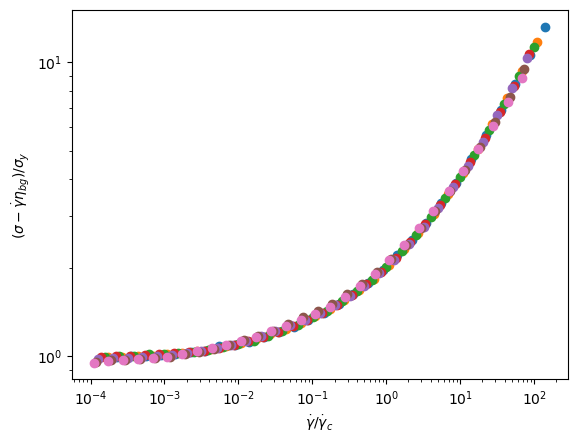

In [11]:
with plt.rc_context({"legend.fontsize": 6}):
    fig, ax = plt.subplots()

    full_x_data_list = []
    full_y_data_list = []

    for sample in sample_list:
        TC_model.set_param_hint("TC_eta_bg", value=0.045, vary=True)
        fit = TC_model.fit(
            data[sample]["Y"],
            x=data[sample]["X"],
            weights=1 / data[sample]["Y"],
            nan_policy="omit",
        )

        x_rescale = fit.best_values["TC_gammadot_crit"]

        ax.plot(
            data[sample]["X"] / x_rescale,
            (data[sample]["Y"] - data[sample]["X"] * fit.best_values["TC_eta_bg"])
            / fit.best_values["TC_ystress"],
            marker="o",
            linestyle="None",
            label=sample,
        )
        full_x_data_list.append(data[sample]["X"] / x_rescale)
        full_y_data_list.append(
            (data[sample]["Y"] - data[sample]["X"] * fit.best_values["TC_eta_bg"])
            / fit.best_values["TC_ystress"]
        )

        ax.set_yscale("log")
        ax.set_xscale("log")

    ax.set_xlabel("$\dot\gamma/\dot\gamma_{c}$")
    ax.set_ylabel("$(\sigma - \dot\gamma \eta_{bg}) / \sigma_{y}$")

    fit = HB_model.fit(
        pd.concat(full_y_data_list),
        x=pd.concat(full_x_data_list),
        weights=1 / pd.concat(full_y_data_list),
        nan_policy="omit",
    )

plt.savefig("TC_mastercurve_no_fit.svg", bbox_inches="tight", transparent=True)

# Figure HB_mastercurve_with_fit

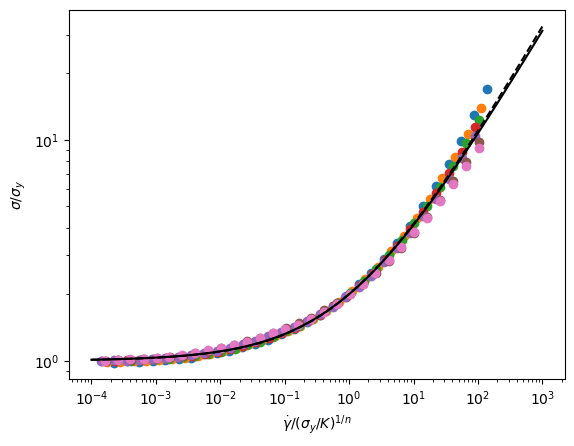

In [12]:
with plt.rc_context({"legend.fontsize": 6}):

    fig, ax = plt.subplots()

    full_x_data_list = []
    full_y_data_list = []

    for sample in sample_list:
        x_rescale = (
            fit_res_table_HB["HB_ystress"][sample]
            / fit_res_table_HB["HB_K"][sample]
        ) ** (1 / fit_res_table_HB["HB_n"][sample])

        ax.plot(
            data[sample]["X"] / x_rescale,
            data[sample]["Y"] / fit_res_table_HB["HB_ystress"][sample],
            marker="o",
            linestyle="None",
            label=sample,
        )
        full_x_data_list.append(data[sample]["X"] / x_rescale)
        full_y_data_list.append(
            data[sample]["Y"] / fit_res_table_HB["HB_ystress"][sample]
        )

        ax.set_yscale("log")
        ax.set_xscale("log")
    # plt.legend()

    ax.set_xlabel("$\dot\gamma / (\sigma_{y}/K)^{1/n}$")
    ax.set_ylabel("$\sigma / \sigma_{y}$")

    fit = HB_model.fit(
        pd.concat(full_y_data_list),
        x=pd.concat(full_x_data_list),
        weights=1 / pd.concat(full_y_data_list),
        nan_policy="omit",
    )

    ax.plot(
        np.logspace(-4, 3),
        1 + np.logspace(-4, 3) ** 0.5,
        color="black",
        linestyle="--",
    )
    ax.plot(np.logspace(-4, 3), fit.eval(x=np.logspace(-4, 3)), color="black")
    fit.chisqr
    display(fit)

plt.savefig("HB_mastercurve_with_fit.svg", bbox_inches="tight", transparent=True)

# Figure TC_mastercurve_with_fit

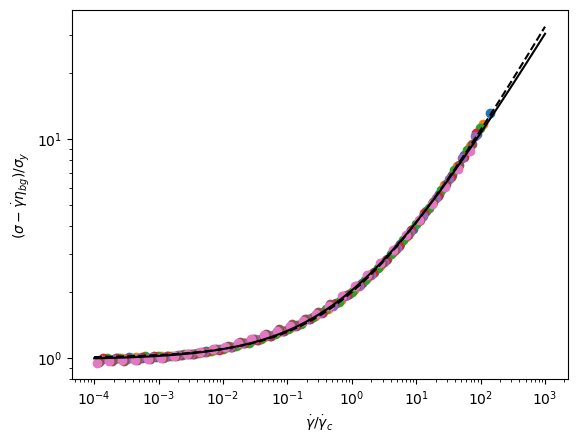

In [13]:
with plt.rc_context({"legend.fontsize": 6}):
    fig, ax = plt.subplots()

    full_x_data_list = []
    full_y_data_list = []

    for sample in sample_list:
        fit = TC_model.fit(
            data[sample]["Y"],
            x=data[sample]["X"],
            weights=1 / data[sample]["Y"],
            nan_policy="omit",
        )

        x_rescale = fit.best_values["TC_gammadot_crit"]

        ax.plot(
            data[sample]["X"] / x_rescale,
            (data[sample]["Y"] - data[sample]["X"] * fit.best_values["TC_eta_bg"])
            / fit.best_values["TC_ystress"],
            marker="o",
            linestyle="None",
            label=sample,
        )
        full_x_data_list.append(data[sample]["X"] / x_rescale)
        full_y_data_list.append(
            (data[sample]["Y"] - data[sample]["X"] * fit.best_values["TC_eta_bg"])
            / fit.best_values["TC_ystress"]
        )

        ax.set_yscale("log")
        ax.set_xscale("log")
    # plt.legend()

    ax.set_xlabel("$\dot\gamma/\dot\gamma_{c}$")
    ax.set_ylabel("$(\sigma - \dot\gamma \eta_{bg}) / \sigma_{y}$")

    fit = HB_model.fit(
        pd.concat(full_y_data_list),
        x=pd.concat(full_x_data_list),
        weights=1 / pd.concat(full_y_data_list),
        nan_policy="omit",
    )

    ax.plot(
        np.logspace(-4, 3),
        1 + np.logspace(-4, 3) ** 0.5,
        color="black",
        linestyle="--",
    )
    ax.plot(np.logspace(-4, 3), fit.eval(x=np.logspace(-4, 3)), color="black")
    display(fit)
plt.savefig("TC_mastercurve_with_fit.svg", bbox_inches="tight", transparent=True)

# Figure ML_mastercurve_no_subtraction

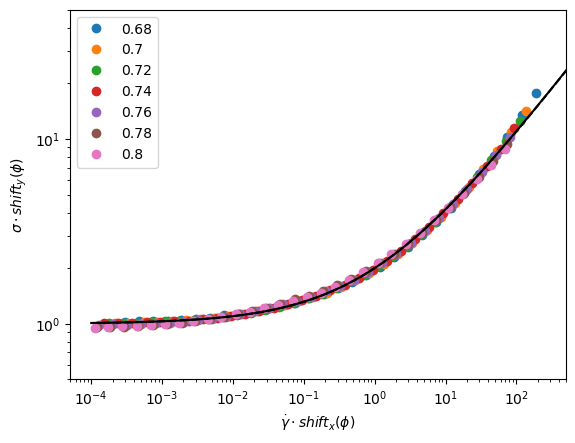

In [14]:
import warnings

warnings.filterwarnings("ignore")

gdots = [np.log(data[sample].X).to_numpy() for sample in sample_list]
sigmas = [np.log(data[sample].Y).to_numpy() for sample in sample_list]
phi = list(map(float, sample_list))

mc = MasterCurve()

# Build a master curve
mc.clear()
mc.add_data(gdots, sigmas, phi)

# Add transformations
mc.add_htransform(Multiply())
mc.add_vtransform(Multiply())

# Superpose
loss = sum(mc.superpose())

full_data = pd.DataFrame.from_dict(
    {"X": np.concatenate(mc.xtransformed), "Y": np.concatenate(mc.ytransformed)}
).sort_values("X")

fit = HB_model.fit(
    np.exp(np.concatenate(mc.ytransformed)),
    x=np.exp(np.concatenate(mc.xtransformed)),
    weights=1 / np.exp(np.concatenate(mc.ytransformed)),
    nan_policy="omit",
)

mc.change_ref(
    0.68,
    (fit.params["HB_ystress"].value / fit.params["HB_K"].value)
    ** (1 / fit.params["HB_n"].value),
    fit.params["HB_ystress"].value,
)

full_data = pd.DataFrame.from_dict(
    {"X": np.concatenate(mc.xtransformed), "Y": np.concatenate(mc.ytransformed)}
).sort_values("X")

fit = HB_model.fit(
    np.exp(np.concatenate(mc.ytransformed)),
    x=np.exp(np.concatenate(mc.xtransformed)),
    weights=1 / np.exp(np.concatenate(mc.ytransformed)),
    nan_policy="omit",
)

with plt.rc_context({"legend.fontsize": 6}):

    for x, y, label in zip(mc.xtransformed, mc.ytransformed, mc.states):
        plt.plot(np.exp(x), np.exp(y), "o", label=label)

    plt.plot(
        np.logspace(-4, 3),
        1 + np.logspace(-4, 3) ** 0.5,
        color="black",
        linestyle="--",
    )
    plt.plot(np.logspace(-4, 3), fit.eval(x=np.logspace(-4, 3)), color="black")
    fit.chisqr
    display(fit)

plt.xscale("log")
plt.yscale("log")
plt.ylim(0.5, 50)
plt.xlim(0.5e-4, 5e2)
plt.xlabel("$\dot\gamma \cdot shift_x(\phi)$")
plt.ylabel("$\sigma \cdot shift_y(\phi)$")
plt.legend()
plt.savefig("ML_mastercurve_no_subtraction.svg", bbox_inches="tight", transparent=True)

# Figure HB_ML_shift_factor

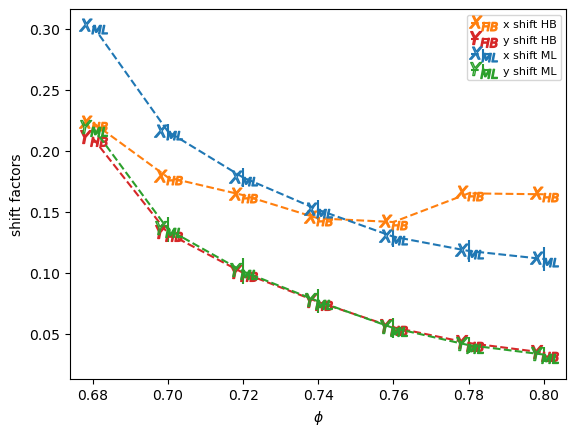

In [15]:
with plt.rc_context({"legend.fontsize": 8}):

    plt.errorbar(
        sample_list,
        mc.hparams[0],
        yerr=mc.huncertainties[0],
        linestyle="--",
        marker="$X_{ML}$",
        markersize=20,
        label="x shift ML",
        mfc="none",
    )
    plt.plot(
        1
        / (fit_res_table_HB["HB_ystress"] / fit_res_table_HB["HB_K"])
        ** (1 / fit_res_table_HB["HB_n"]),
        "o-",
        linestyle="--",
        marker="$X_{HB}$",
        markersize=20,
        label="x shift HB",
    )

    plt.errorbar(
        sample_list,
        mc.vparams[0],
        yerr=mc.vuncertainties[0],
        linestyle="--",
        marker="$Y_{ML}$",
        markersize=20,
        label="y shift ML",
        mfc="none",
    )
    plt.plot(
        1 / fit_res_table_HB["HB_ystress"],
        "o-",
        linestyle="--",
        marker="$Y_{HB}$",
        markersize=20,
        label="y shift HB",
    )

    plt.legend()
    plt.ylabel("shift factors")
    plt.xlabel("$\phi$")
    fit_res_table_HB

plt.savefig("HB_ML_shift_factor.svg", bbox_inches="tight", transparent=True)

# Figure ML_loss_subtraction

In [16]:
import warnings

warnings.filterwarnings("ignore")


bg_visc_list = [
    0.000000,
    0.01,
    0.02,
    0.03,
    0.04,
    0.041,
    0.042,
    0.043,
    0.044,
    0.045,
    0.0452,
    0.0454,
    0.0455,
    0.0456,
    0.0458,
    0.046,
    0.0463,
    0.0465,
    0.0466,
    0.0467,
    0.047,
    0.048,
    0.049,
    0.05,
    0.055,
    0.057,
    0.06,
    0.063,
    0.066,
    0.07,
]

loss_list = []

for bg_visc in bg_visc_list:
    gdots = [np.log(data[sample].X).to_numpy() for sample in sample_list]
    sigmas = [
        np.log(data[sample].Y - bg_visc * data[sample].X).to_numpy()
        for sample in sample_list
    ]

    phi = map(float, sample_list)

    mc = MasterCurve()
    # Build a master curve
    mc.clear()
    mc.add_data(gdots, sigmas, phi)

    # Add transformations
    mc.add_htransform(Multiply())
    mc.add_vtransform(Multiply())

    # Superpose
    loss = np.sum(np.array(mc.superpose()))

    loss_list.append(loss)

loss_table = pd.DataFrame.from_dict({"bg_visc": bg_visc_list, "loss": loss_list})
loss_table.sort_values("bg_visc", inplace=True)

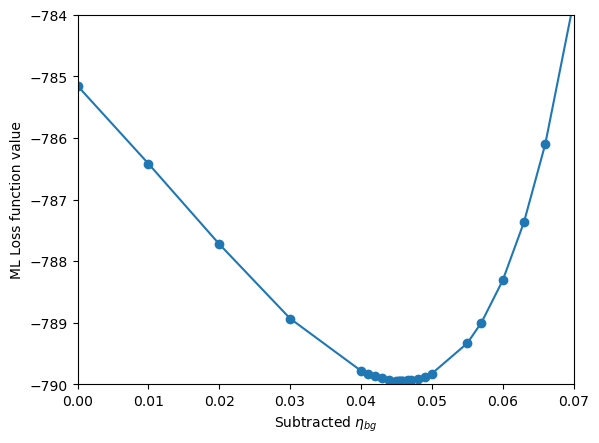

In [17]:
with plt.rc_context({"legend.fontsize": 8}):
    plt.plot(loss_table["bg_visc"], loss_table["loss"], "o-")
    plt.ylim(-790, -784)
    plt.xlim(0, 0.07)

plt.ylabel("ML Loss function value")
plt.xlabel("Subtracted $\eta_{bg}$")

plt.savefig("ML_loss_subtraction.svg", bbox_inches="tight", transparent=True)

# Figure ML_mastercureve_with_subtraction

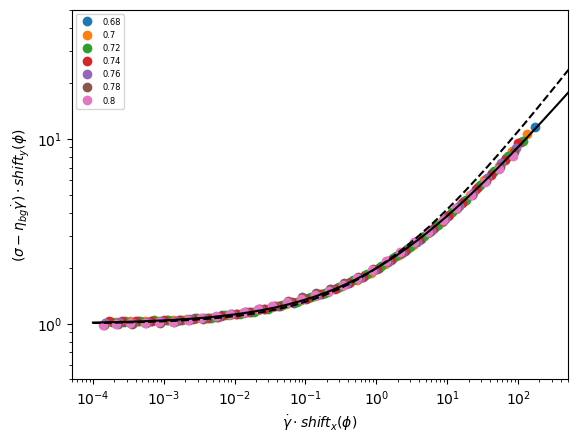

In [18]:
bg_visc = 0.045

gdots = [np.log(data[sample].X).to_numpy() for sample in sample_list]
sigmas = [
    np.log(data[sample].Y - bg_visc * data[sample].X).to_numpy()
    for sample in sample_list
]
phi = map(float, sample_list)


# Build a master curve
mc.clear()
mc.add_data(gdots, sigmas, phi)

# Add transformations
mc.add_htransform(Multiply())
mc.add_vtransform(Multiply())

# Superpose
loss = np.sum(np.array(mc.superpose()))

full_data = pd.DataFrame.from_dict(
    {"X": np.concatenate(mc.xtransformed), "Y": np.concatenate(mc.ytransformed)}
).sort_values("X")

fit = HB_model.fit(
    np.exp(np.concatenate(mc.ytransformed)),
    x=np.exp(np.concatenate(mc.xtransformed)),
    weights=1 / np.exp(np.concatenate(mc.ytransformed)),
    nan_policy="omit",
)

mc.change_ref(
    0.68,
    (fit.params["HB_ystress"].value / fit.params["HB_K"].value)
    ** (1 / fit.params["HB_n"].value),
    fit.params["HB_ystress"].value,
)

full_data = pd.DataFrame.from_dict(
    {"X": np.concatenate(mc.xtransformed), "Y": np.concatenate(mc.ytransformed)}
).sort_values("X")

fit = HB_model.fit(
    np.exp(np.concatenate(mc.ytransformed)),
    x=np.exp(np.concatenate(mc.xtransformed)),
    weights=1 / np.exp(np.concatenate(mc.ytransformed)),
    nan_policy="omit",
)

with plt.rc_context({"legend.fontsize": 6}):

    for x, y, label in zip(mc.xtransformed, mc.ytransformed, mc.states):
        plt.plot(np.exp(x), np.exp(y), "o", label=label)

    plt.plot(
        np.logspace(-4, 3),
        1 + np.logspace(-4, 3) ** 0.5,
        color="black",
        linestyle="--",
    )

    plt.plot(np.logspace(-4, 3), fit.eval(x=np.logspace(-4, 3)), color="black")
    plt.legend()
    fit.chisqr

    display(fit)
        
plt.xscale("log")
plt.yscale("log")
plt.ylim(0.5, 50)
plt.xlim(0.5e-4, 5e2)
plt.xlabel("$\dot\gamma \cdot shift_x(\phi)$")
plt.ylabel("$(\sigma - \eta_{bg} \dot\gamma) \cdot shift_y(\phi)$")

plt.savefig(
    "ML_mastercureve_with_subtraction.svg", bbox_inches="tight", transparent=True
)

# Figure TC_mastercurve_fixed_viscosity

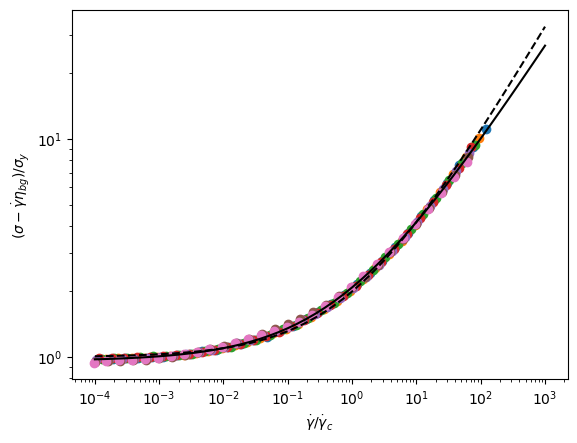

In [19]:
with plt.rc_context({"legend.fontsize": 6}):
    fig, ax = plt.subplots()

    full_x_data_list = []
    full_y_data_list = []

    for sample in sample_list:
        TC_model.set_param_hint("eta_bg", value=0.045, vary=False)
        fit = TC_model.fit(
            data[sample]["Y"],
            x=data[sample]["X"],
            weights=1 / data[sample]["Y"],
            nan_policy="omit",
        )

        x_rescale = fit.best_values["TC_gammadot_crit"]

        ax.plot(
            data[sample]["X"] / x_rescale,
            (data[sample]["Y"] - data[sample]["X"] * fit.best_values["TC_eta_bg"])
            / fit.best_values["TC_ystress"],
            marker="o",
            linestyle="None",
            label=sample,
        )
        full_x_data_list.append(data[sample]["X"] / x_rescale)
        full_y_data_list.append(
            (data[sample]["Y"] - data[sample]["X"] * fit.best_values["TC_eta_bg"])
            / fit.best_values["TC_ystress"]
        )

        ax.set_yscale("log")
        ax.set_xscale("log")
    # plt.legend()

    ax.set_xlabel("$\dot\gamma/\dot\gamma_{c}$")
    ax.set_ylabel("$(\sigma - \dot\gamma \eta_{bg}) / \sigma_{y}$")

    fit = HB_model.fit(
        pd.concat(full_y_data_list),
        x=pd.concat(full_x_data_list),
        weights=1 / pd.concat(full_y_data_list),
        nan_policy="omit",
    )

    ax.plot(
        np.logspace(-4, 3),
        1 + np.logspace(-4, 3) ** 0.5,
        color="black",
        linestyle="--",
    )
    ax.plot(np.logspace(-4, 3), fit.eval(x=np.logspace(-4, 3)), color="black")
    display(fit)
plt.savefig("TC_mastercurve_fixed_viscosity.svg", bbox_inches="tight", transparent=True)

# figure TC_ML_shift_factor

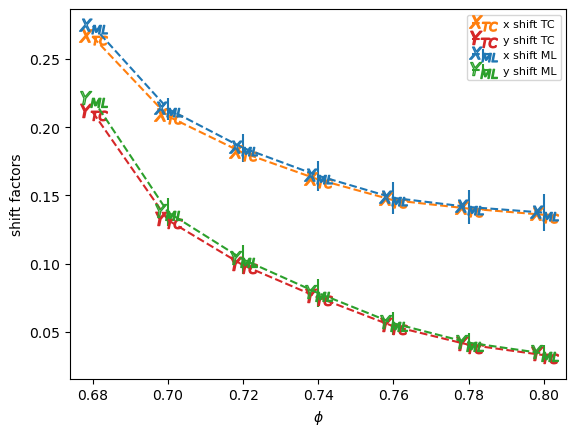

In [20]:
with plt.rc_context({"legend.fontsize": 8}):

    plt.errorbar(
        sample_list,
        mc.hparams[0],
        yerr=mc.huncertainties[0],
        linestyle="--",
        marker="$X_{ML}$",
        markersize=20,
        label="x shift ML",
        mfc="none",
    )
    plt.plot(
        1.4 / fit_res_table_TC["TC_gammadot_crit"],
        "o-",
        linestyle="--",
        marker="$X_{TC}$",
        markersize=20,
        label="x shift TC",
    )

    plt.errorbar(
        sample_list,
        mc.vparams[0],
        yerr=mc.vuncertainties,
        linestyle="--",
        marker="$Y_{ML}$",
        markersize=20,
        label="y shift ML",
        mfc="none",
    )
    plt.plot(
        1 / fit_res_table_TC["TC_ystress"],
        "o-",
        linestyle="--",
        marker="$Y_{TC}$",
        markersize=20,
        label="y shift TC",
    )

    plt.legend()

    fit_res_table_TC
    plt.legend()
    plt.ylabel("shift factors")
    plt.xlabel("$\phi$")
    fit_res_table_HB

plt.savefig("TC_ML_shift_factor.svg", bbox_inches="tight", transparent=True)

# Data 1.5% carbopol in PG for different temperatures

In [21]:
excelfile = pd.ExcelFile("./cp15_pg_multit_10-60.xls")
exp_label_list = excelfile.sheet_names[1:]
sample_list = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

data_dict = {}
for exp, temp in zip(exp_label_list, sample_list):
    table = excelfile.parse(sheet_name=exp, skiprows=[0, 2])
    condition = table["Shear rate"] > 0.01
    data_dict[(temp, "X")] = table["Shear rate"]
    data_dict[(temp, "Y")] = table["Stress"]

data = pd.DataFrame.from_dict(data_dict)

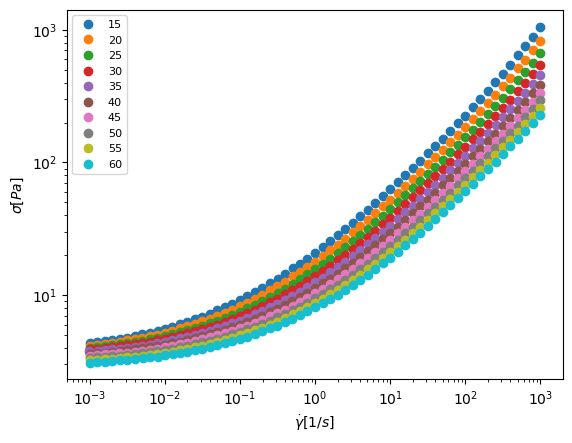

In [22]:
with plt.rc_context({"legend.fontsize": 8}):
    for sample in sample_list:
        plt.loglog(data[sample]["X"], data[sample]["Y"], "o", label=sample)
        plt.legend()
        plt.xlabel("$\dot\gamma [1/s]$")
        plt.ylabel("$\sigma [Pa]$")

plt.savefig("PGpol_multi_T.svg", bbox_inches="tight", transparent=True)

# HB mastercurve for 1.5% carbopol in PG

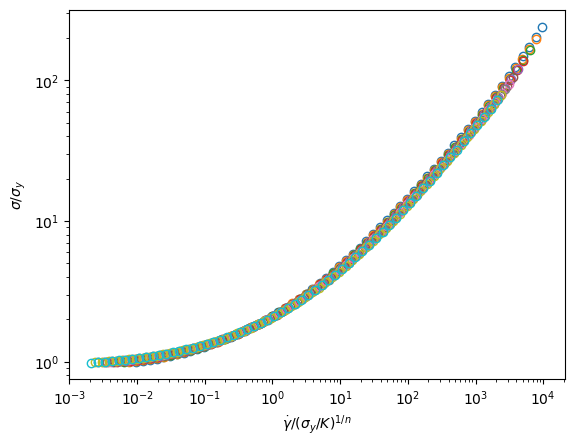

In [23]:
with plt.rc_context({"legend.fontsize": 8}):
    fig, ax = plt.subplots()

    for sample in sample_list:
        fit = HB_model.fit(
            data[sample]["Y"],
            x=data[sample]["X"],
            weights=1 / data[sample]["Y"],
            nan_policy="omit",
        )

        x_rescale = (fit.best_values["HB_ystress"] / fit.best_values["HB_K"]) ** (
            1 / fit.best_values["HB_n"]
        )

        ax.plot(
            data[sample]["X"] / x_rescale,
            data[sample]["Y"] / fit.best_values["HB_ystress"],
            marker="o",
            linestyle="None",
            mfc="None",
            label=sample,
        )
        ax.set_yscale("log")
        ax.set_xscale("log")

    ax.set_xlabel("$\dot\gamma / (\sigma_{y}/K)^{1/n}$")
    ax.set_ylabel("$\sigma / \sigma_{y}$")

plt.savefig("PGpol_multi_T_HB_masercurve.svg", bbox_inches="tight", transparent=True)

# TC mastercurve for 1.5% carbopol in PG

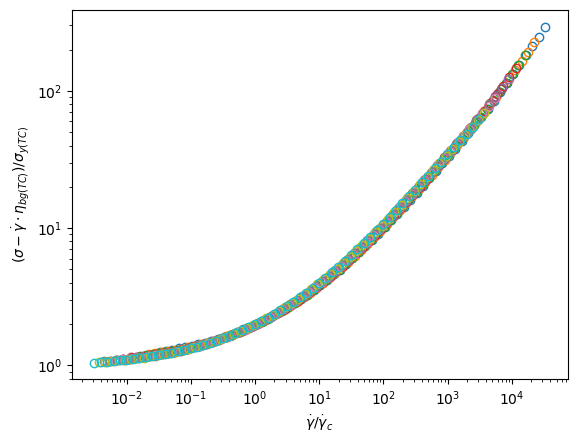

In [24]:
with plt.rc_context({"legend.fontsize": 8}):

    fig, ax = plt.subplots()

    for sample in sample_list:
        fit = TC_model.fit(
            data[sample]["Y"],
            x=data[sample]["X"],
            weights=1 / data[sample]["Y"],
            nan_policy="omit",
        )

        x_rescale = fit.best_values["TC_gammadot_crit"]

        ax.plot(
            data[sample]["X"] / x_rescale,
            (data[sample]["Y"] - data[sample]["X"] * fit.best_values["TC_eta_bg"])
            / fit.best_values["TC_ystress"],
            marker="o",
            linestyle="None",
            mfc="None",
            label=sample,
        )
        ax.set_yscale("log")
        ax.set_xscale("log")

    ax.set_xlabel("$\dot\gamma/\dot\gamma_c$")
    ax.set_ylabel("$(\sigma - \dot\gamma \cdot \eta_{bg(TC)}) / \sigma_{y(TC)}$")

plt.savefig("PGpol_multi_T_TC_masercurve.svg", bbox_inches="tight", transparent=True)

# Data from "Investigation of the swollen state of Carbopol molecules in non-aqueous solvents through rheological characterization"

```
@article{migliozzi2020investigation,
  title={Investigation of the swollen state of Carbopol molecules in non-aqueous solvents through rheological characterization},
  author={Migliozzi, Simona and Meridiano, Giovanni and Angeli, Panagiota and Mazzei, Luca},
  journal={Soft Matter},
  volume={16},
  number={42},
  pages={9799--9815},
  year={2020},
  publisher={Royal Society of Chemistry}
}
```
fig 6

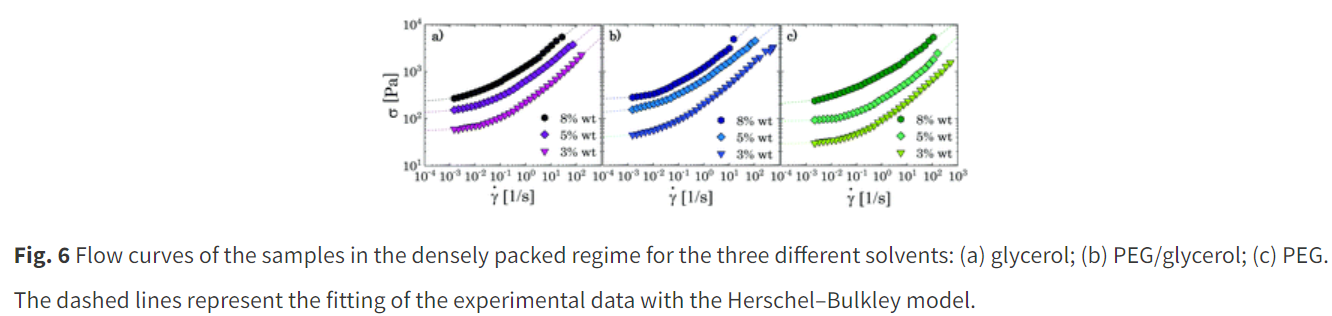

fig 9

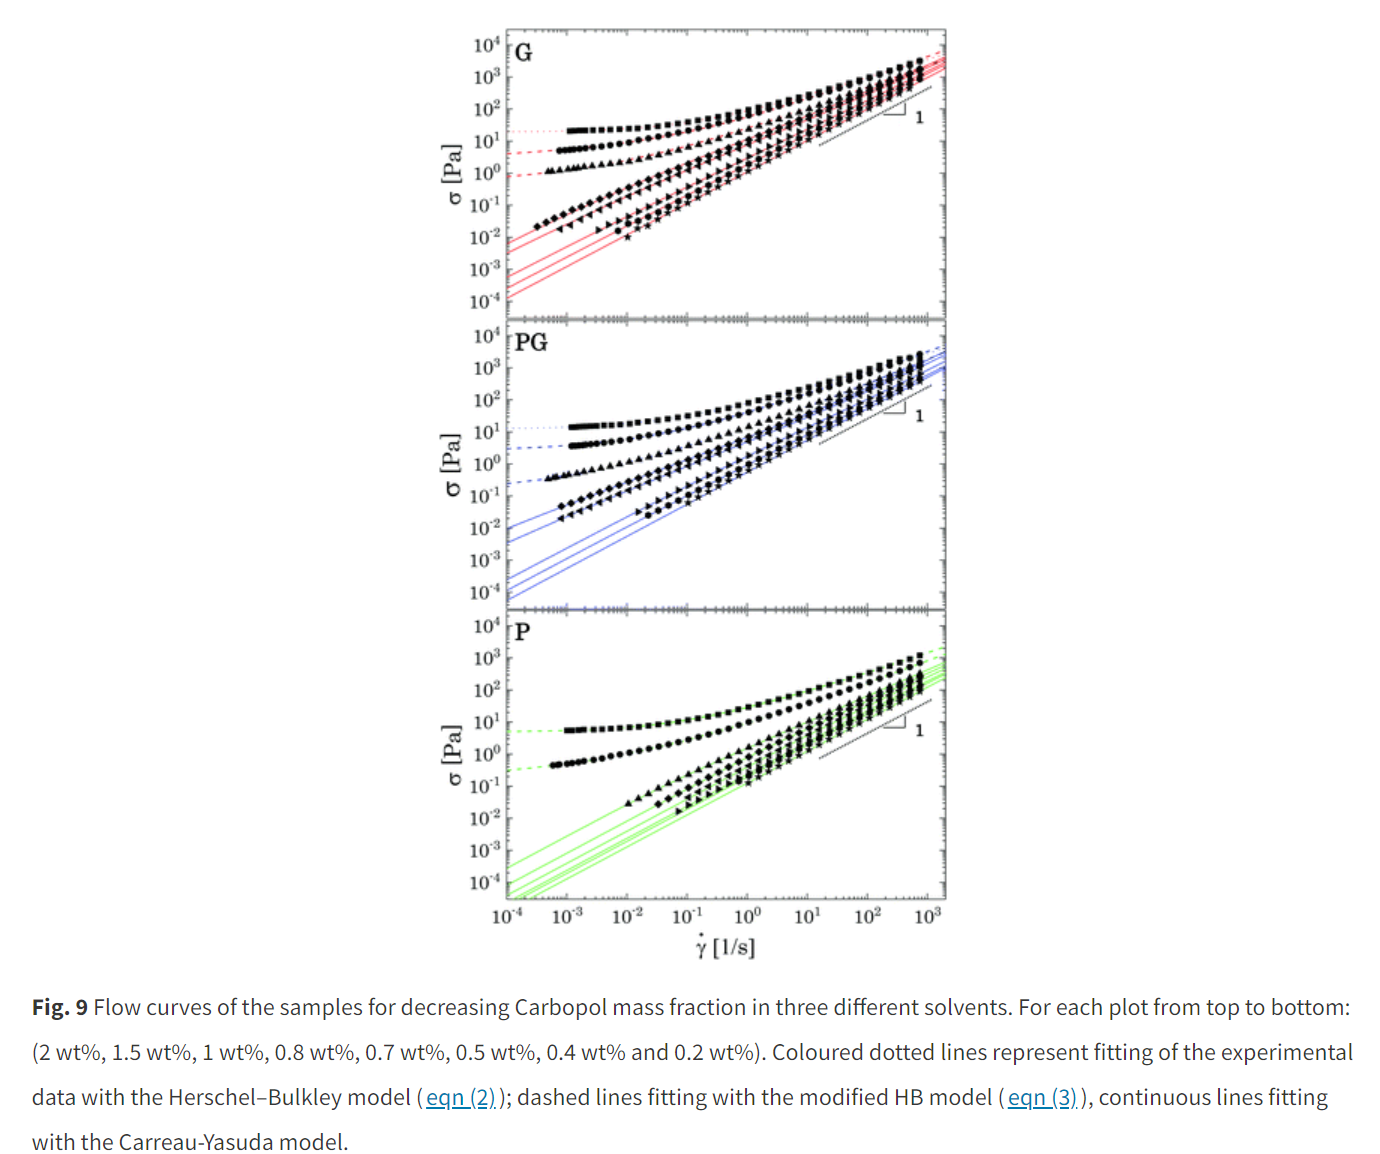

In [25]:
data_table = pd.read_csv("carbopol_migliozzi.csv", header=[0, 1])
sample_label_list = list(data_table.columns.get_level_values(0).unique())

sample_label_dict = {
    "G_8pc": "8\% carbopol in Glycerin",
    "G_5pc": "5\% carbopol in Glycerin",
    "G_3pc": "3\% carbopol in Glycerin",
    "PG_8pc": "8\% carbopol in Glycerin/PEG mixture",
    "PG_5pc": "5\% carbopol in Glycerin/PEG mixture",
    "PG_3pc": "3\% carbopol in Glycerin/PEG mixture",
    "P_8pc": "8\% carbopol in PEG",
    "P_5pc": "5\% carbopol in PEG",
    "P_3pc": "3\% carbopol in PEG",
    "G_2pcCP": "2\% carbopol in Glycerin",
    "G_1p5pcCP": "1.5\% carbopol in Glycerin",
    "G_1pcCP": "1\% carbopol in Glycerin",
    "PG_2pcCP": "2\% carbopol in Glycerin/PEG mixture",
    "PG_1p5pcCP": "1.5\% carbopol in Glycerin/PEG mixture",
    "PG_1pcCP": "1\% carbopol in Glycerin/PEG mixture",
    "P_2pcCP": "2\% carbopol in PEG",
    "P_1p5pcCP": "1.5\% carbopol in PEG",
}

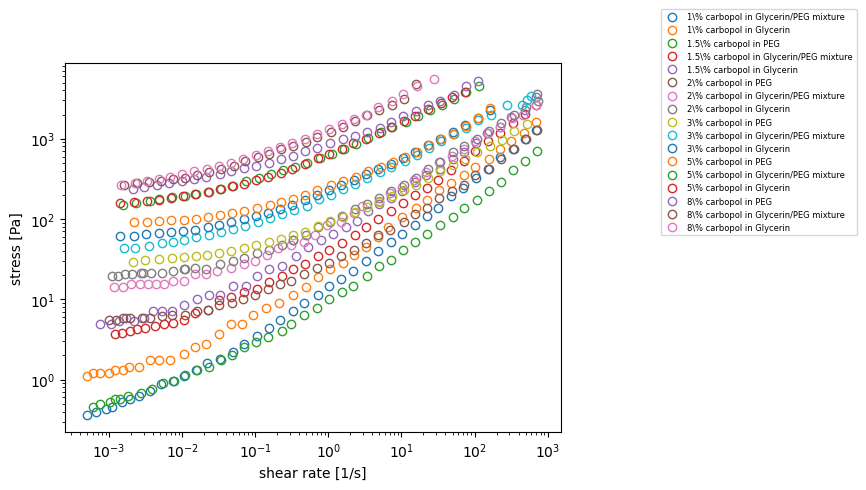

In [26]:
with plt.rc_context({"legend.fontsize": 6}):

    fig, ax = plt.subplots()

    for sample_label in sample_label_list:
        data = data_table[sample_label]
        ax.plot(
            data["X"],
            data["Y"],
            marker="o",
            linestyle="None",
            mfc="None",
            label=sample_label_dict[sample_label],
        )
        ax.set_yscale("log")
        ax.set_xscale("log")

    ax.set_xlabel("shear rate [1/s]")
    ax.set_ylabel("stress [Pa]")
    fig.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig("raw_data_solvents.svg", bbox_inches="tight", transparent=True)

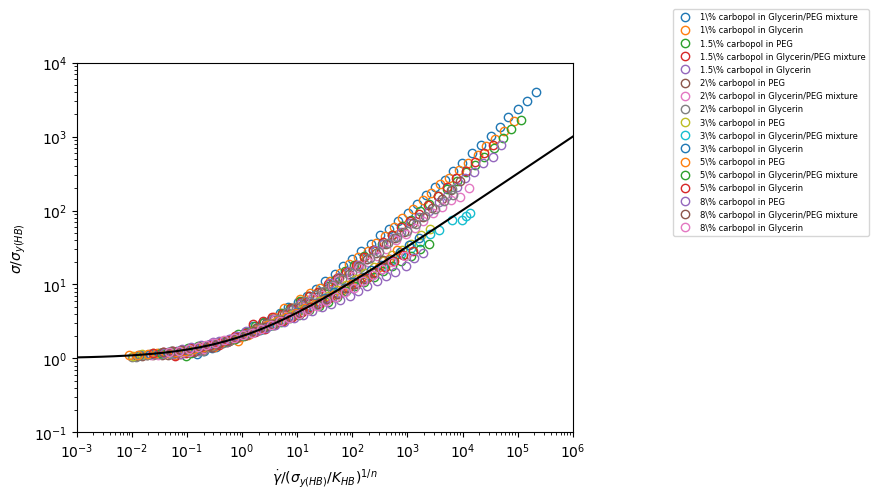

In [27]:
with plt.rc_context({"legend.fontsize": 6}):
    fig, ax = plt.subplots()

    for sample_label in sample_label_list:
        data = data_table[sample_label]
        fit = HB_model.fit(
            data["Y"], x=data["X"], weights=1 / data["Y"], nan_policy="omit"
        )

        x_rescale = (fit.best_values["HB_ystress"] / fit.best_values["HB_K"]) ** (
            1 / fit.best_values["HB_n"]
        )

        ax.plot(
            data["X"] / x_rescale,
            data["Y"] / fit.best_values["HB_ystress"],
            marker="o",
            linestyle="None",
            mfc="None",
            label=sample_label_dict[sample_label],
        )
        ax.set_yscale("log")
        ax.set_xscale("log")

    ax.plot(np.logspace(-3, 8), 1 + np.logspace(-3, 8) ** 0.5, color="black")
    fig.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.set_xlabel("$\dot\gamma / (\sigma_{y(HB)}/K_{HB})^{1/n}$")
    ax.set_ylabel("$\sigma / \sigma_{y(HB)}$")
    ax.set_xlim(0.001, 1e6)
    ax.set_ylim(0.1, 1e4)

fig.savefig("HB_migliozzi_mastercurve.svg", bbox_inches="tight", transparent=True)

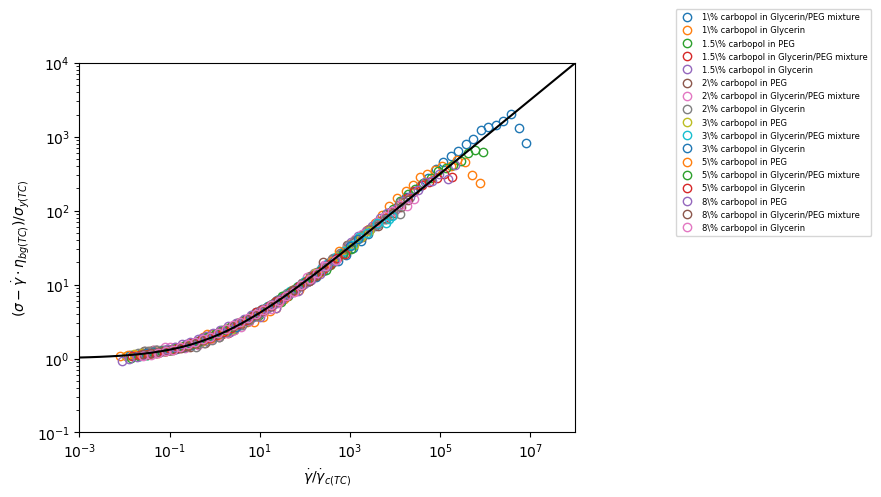

In [28]:
TC_model.set_param_hint("TC_eta_bg", value=1, vary=True)

with plt.rc_context({"legend.fontsize": 6}):
    fig, ax = plt.subplots()

    for sample_label in sample_label_list:
        data = data_table[sample_label]
        fit = TC_model.fit(
            data["Y"], x=data["X"], weights=1 / data["Y"], nan_policy="omit"
        )

        x_rescale = fit.best_values["TC_gammadot_crit"]

        ax.plot(
            data["X"] / x_rescale,
            (data["Y"] - data["X"] * fit.best_values["TC_eta_bg"])
            / fit.best_values["TC_ystress"],
            marker="o",
            linestyle="None",
            mfc="None",
            label=sample_label_dict[sample_label],
        )
        ax.set_yscale("log")
        ax.set_xscale("log")

    ax.plot(np.logspace(-3, 8), 1 + np.logspace(-3, 8) ** 0.5, color="black")

    ax.set_xlabel("$\dot\gamma/\dot\gamma_{c(TC)}$")
    ax.set_ylabel("$(\sigma - \dot\gamma \cdot \eta_{bg(TC)}) / \sigma_{y(TC)}$")
    ax.set_xlim(0.001, 1e8)
    ax.set_ylim(0.1, 1e4)
    fig.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

fig.savefig("TC mastercurve.svg", bbox_inches="tight", transparent=True)